**Load Dataset**

In [ ]:
# Install kaggle library
!pip install kaggle

# Upload kaggle.json
from google.colab import files
files.upload()

n


Saving kaggle.json to kaggle (4).json


{'kaggle (4).json': b'{"username":"smmmmmmmm","key":"7b133f9532960b035175029dd9cafb37"}'}

In [ ]:
# Move kaggle.json to the correct folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d unsdsn/world-happiness
!unzip world-happiness.zip

Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
world-happiness.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  world-happiness.zip
replace 2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2018.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2019.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
happiness_data = pd.read_csv("2019.csv")

# Basic information about the dataset
happiness_data.info()
happiness_data.describe()
happiness_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


**Exploratory Data Analysis**


---


Distribution of Happiness Scores

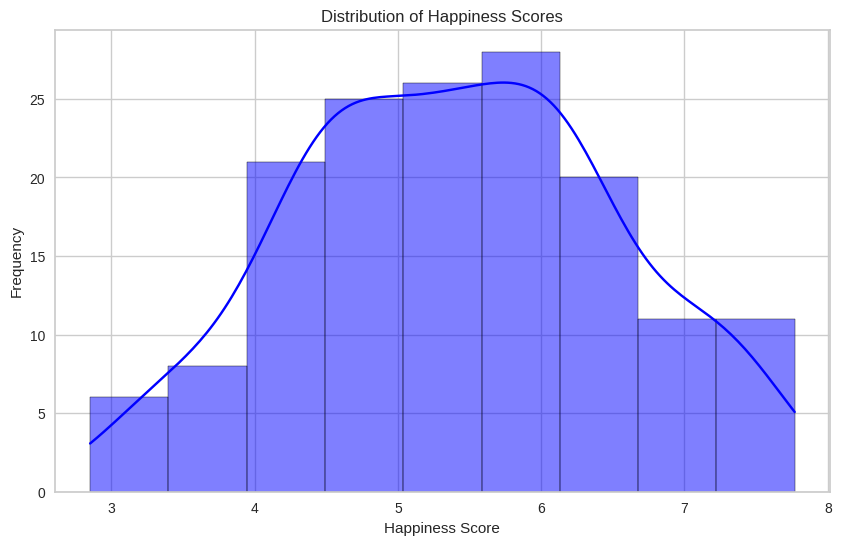

In [ ]:
# Distribution of the happiness score
plt.figure(figsize=(10, 6))
sns.histplot(happiness_data['Score'], kde=True, color='blue')
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

Happiness Score vs Feature

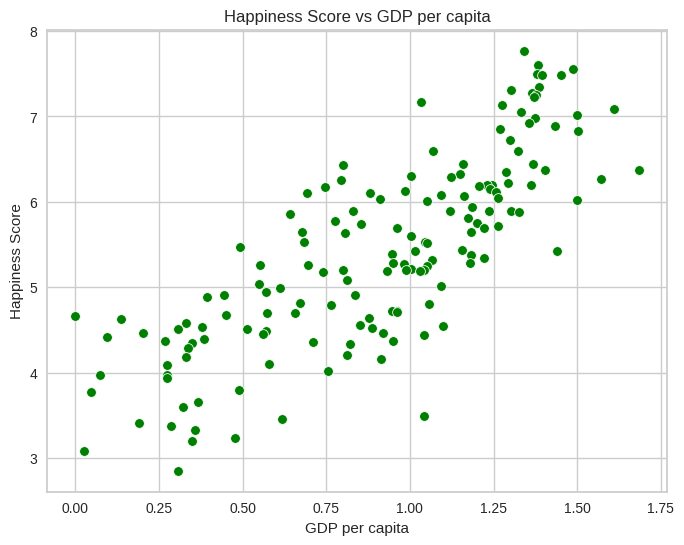

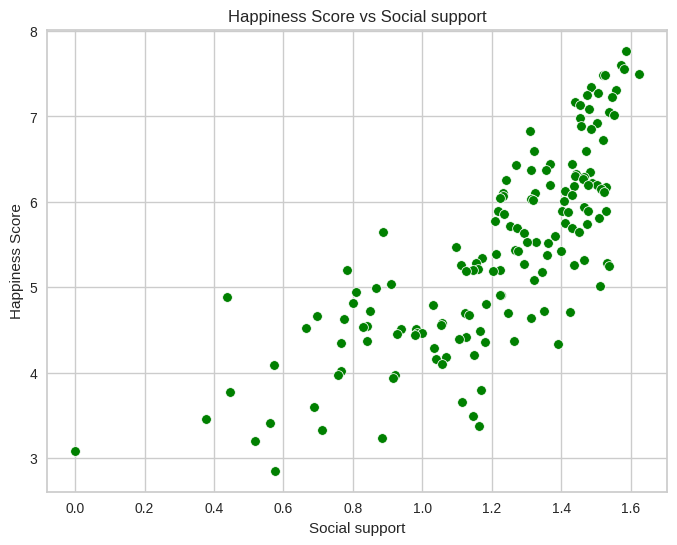

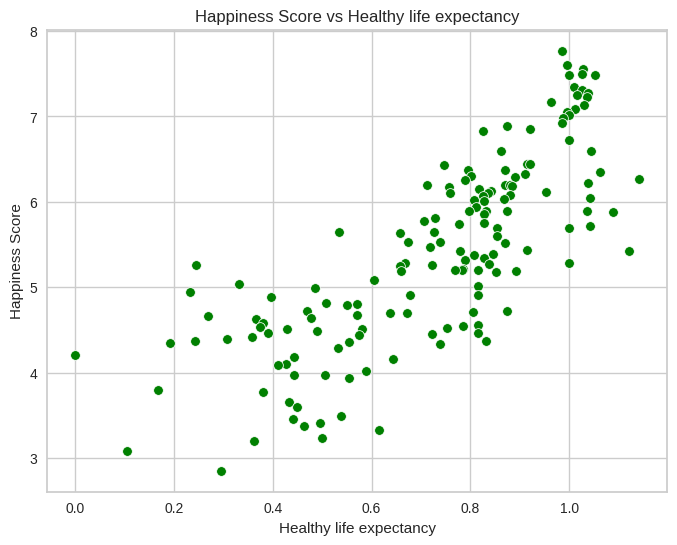

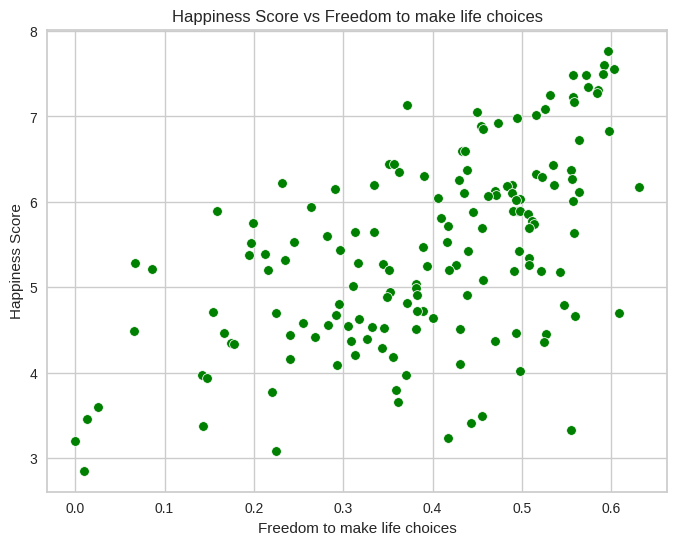

In [ ]:
# Scatter plots for key features vs. Happiness Score
key_features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']

for feature in key_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=happiness_data[feature], y=happiness_data['Score'], color='green')
    plt.title(f'Happiness Score vs {feature}')
    plt.xlabel(feature)
    plt.ylabel("Happiness Score")
    plt.grid(True)
    plt.show()

Pairplot of Features and Happiness Score

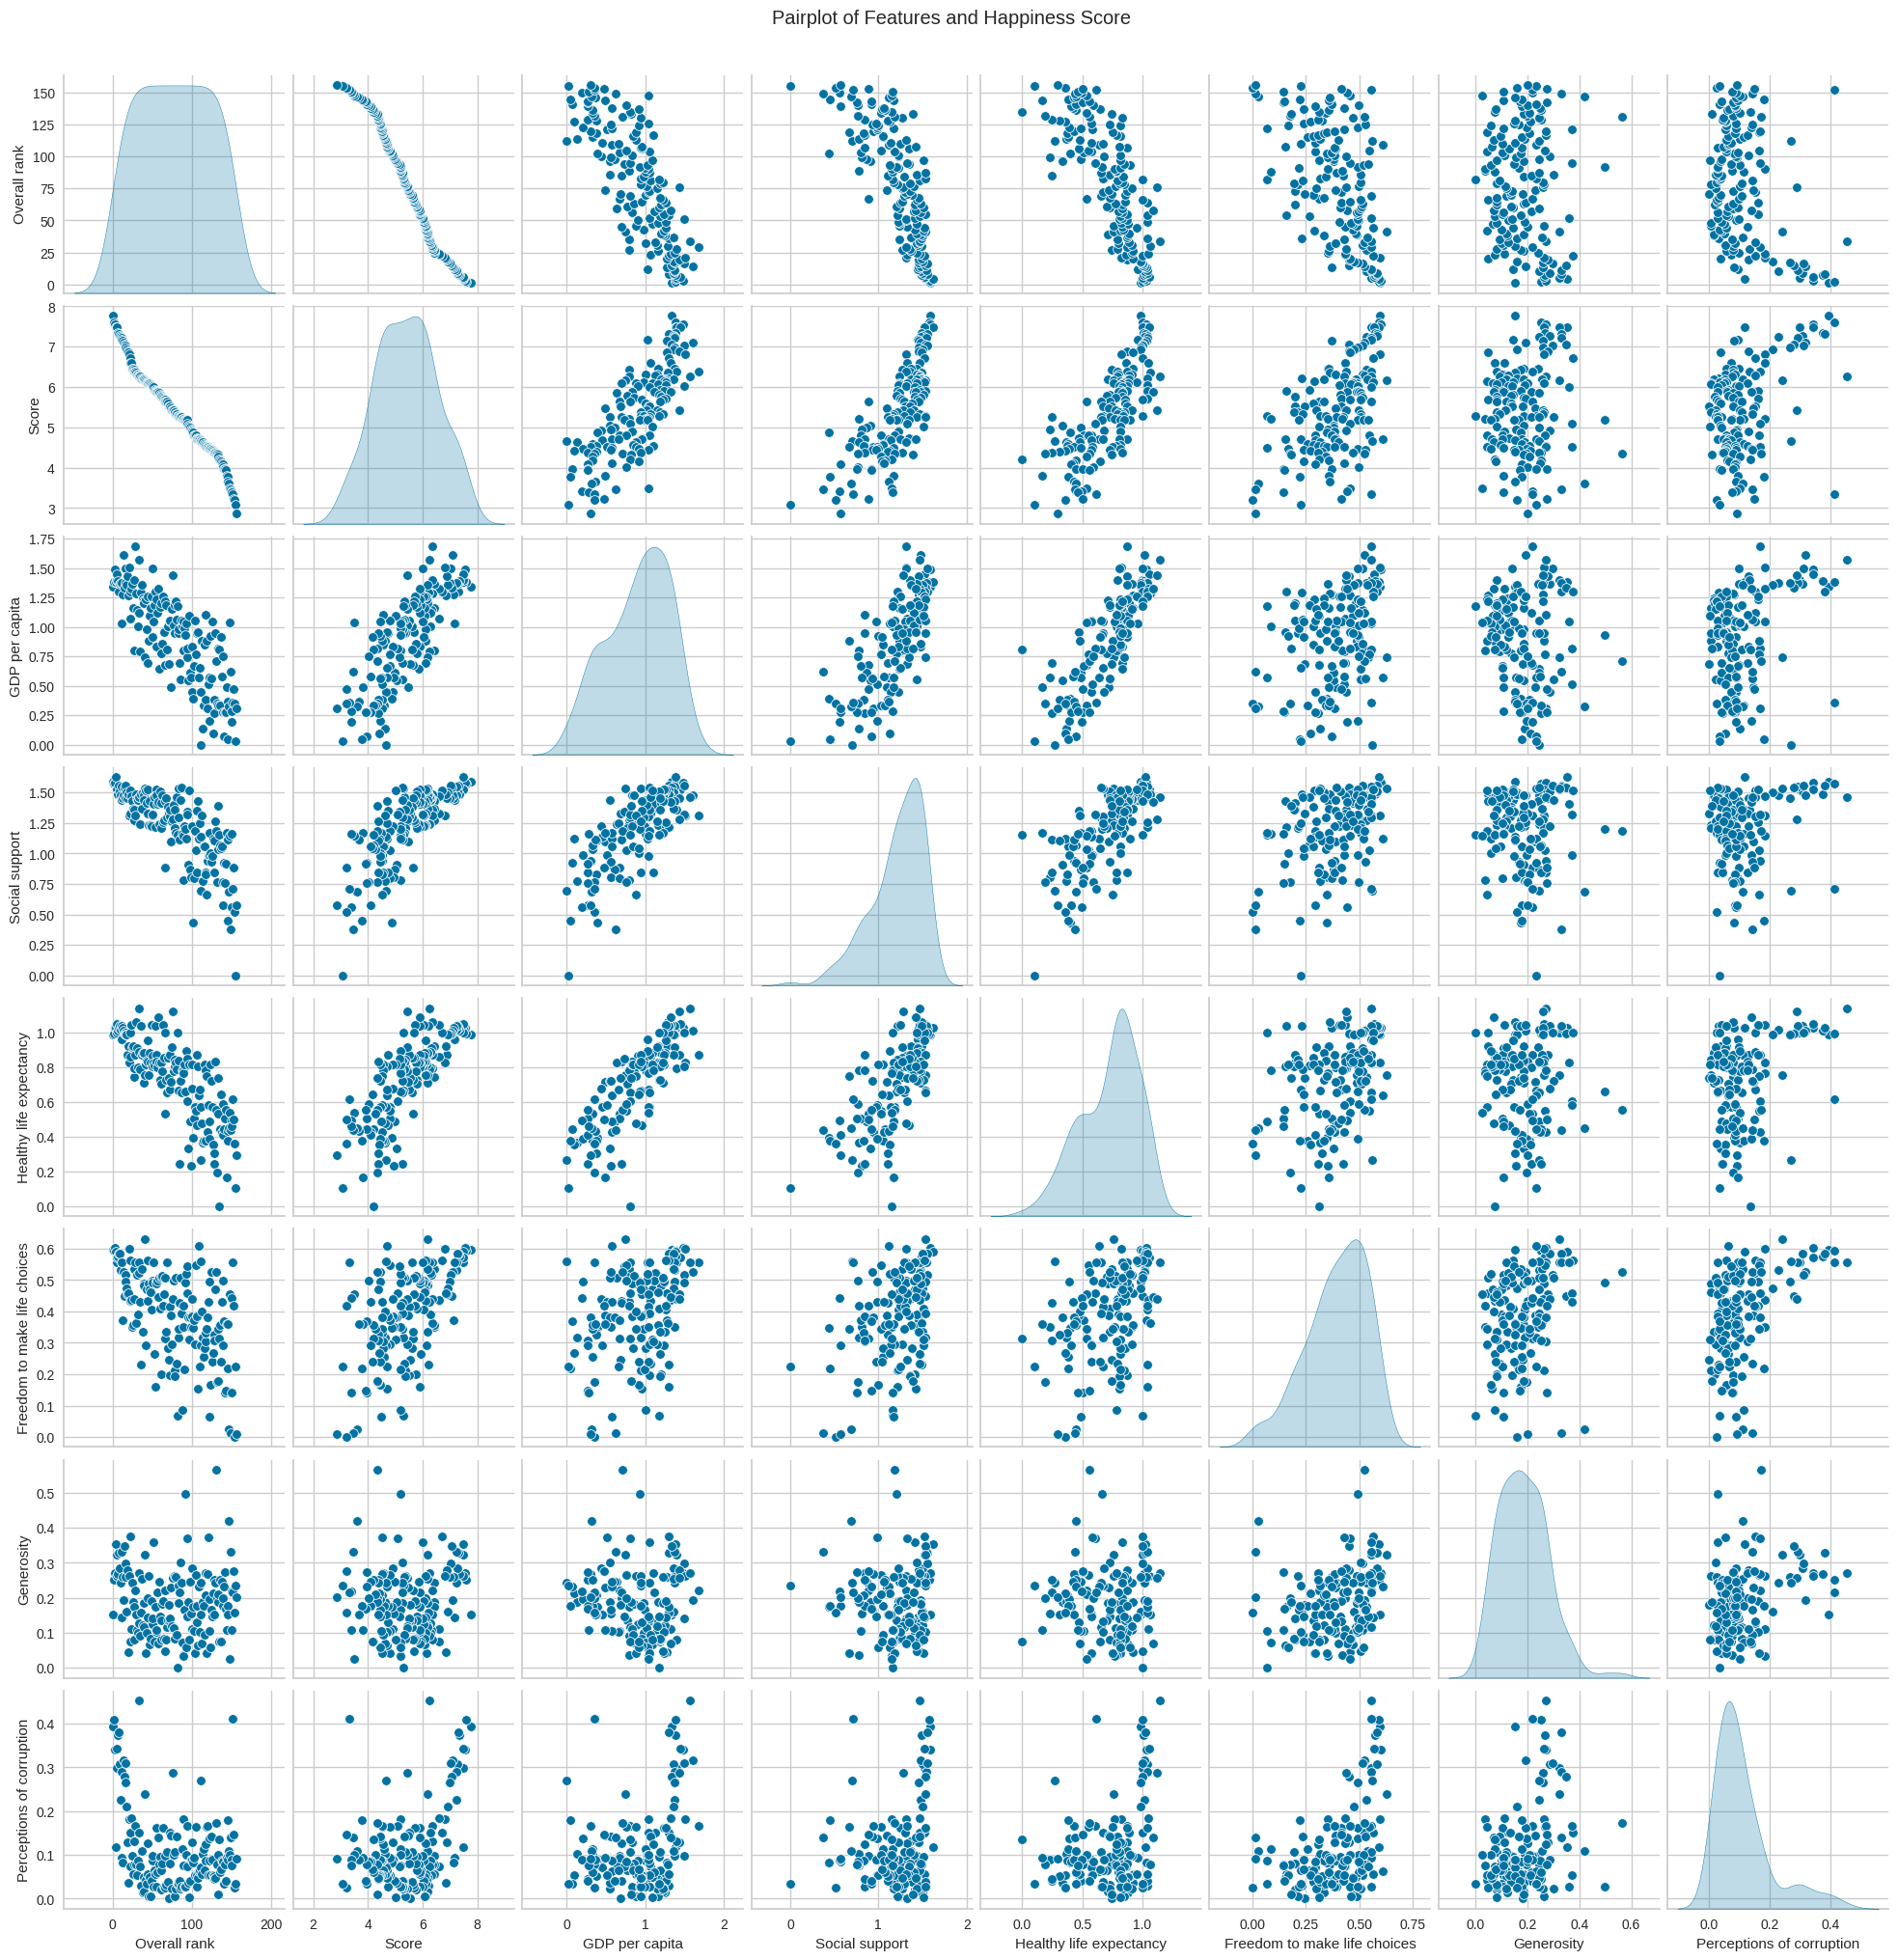

In [ ]:
# Pairplot for relationships between all features and the Happiness Score
sns.pairplot(happiness_data, diag_kind="kde", palette="coolwarm")
plt.suptitle("Pairplot of Features and Happiness Score", y=1.02)
plt.show()

Boxplot of Features

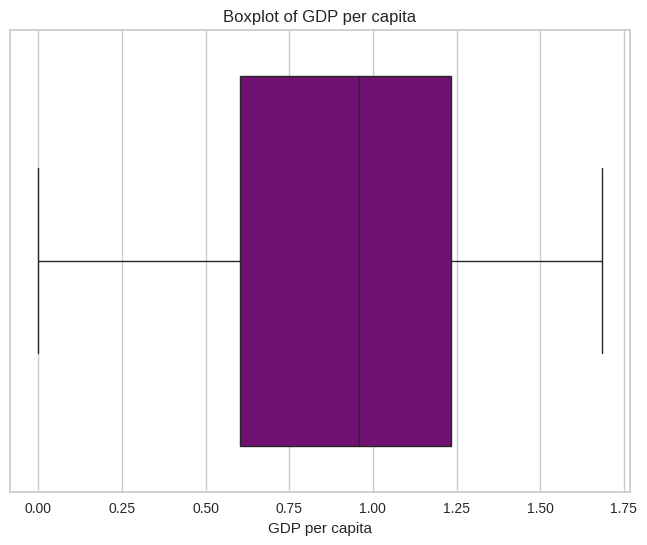

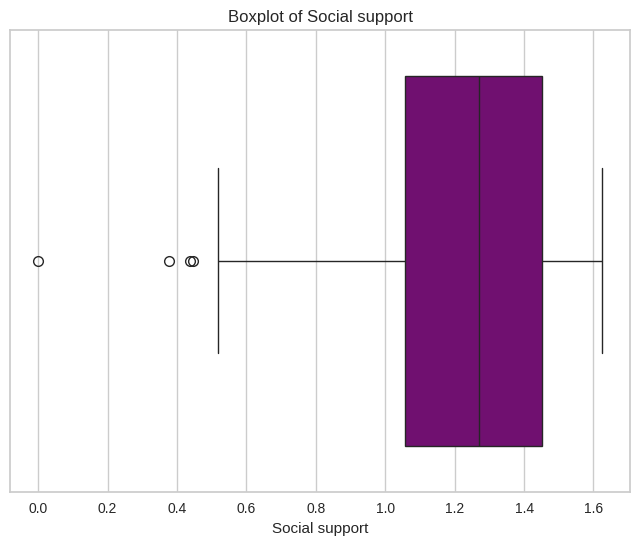

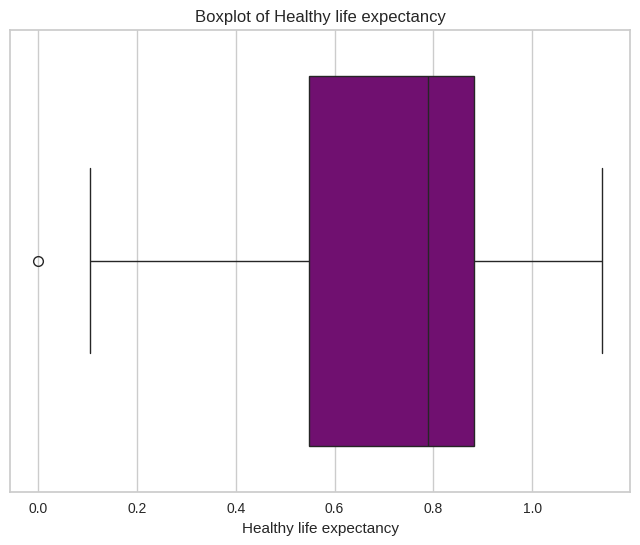

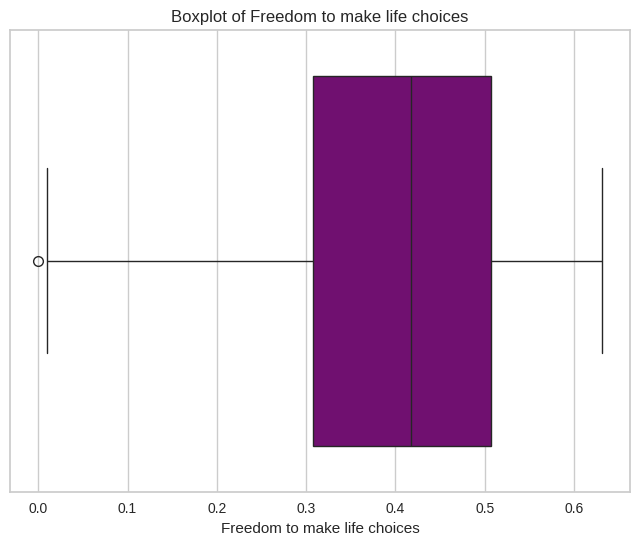

In [ ]:
# Boxplots for detecting outliers in numerical features
numerical_features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=happiness_data[feature], color='purple')
    plt.title(f"Boxplot of {feature}")
    plt.show()

Violin Plot of Happiness Scores

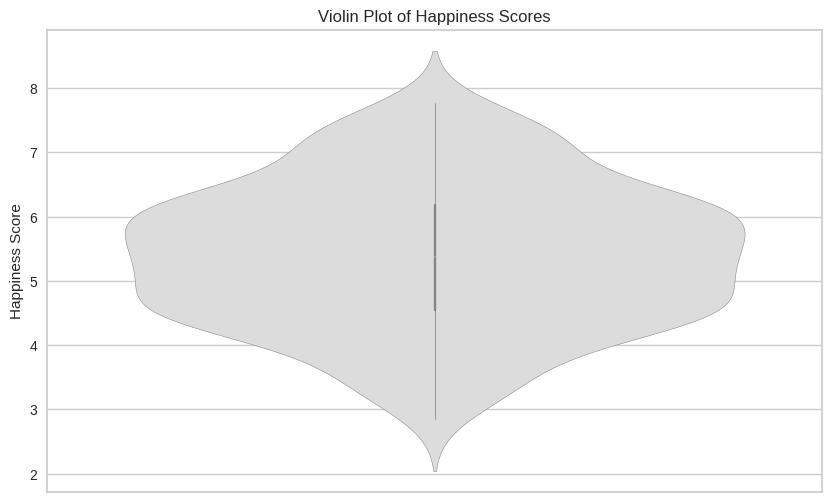

In [ ]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.violinplot(y=happiness_data['Score'], palette="coolwarm")
plt.title("Violin Plot of Happiness Scores")
plt.ylabel("Happiness Score")
plt.show()

**Machine Learning Models**


---

Data Preprocessing

In [ ]:
# Drop unnecessary columns
processed_data = happiness_data.drop(columns=['Overall rank', 'Country or region'])

# Split data into features and target
X = processed_data.drop(columns=['Score'])
y = processed_data['Score']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training


                        MAE       MSE  R2 Score
Random Forest      0.492294  0.386368  0.628750
Linear Regression  0.495462  0.414464  0.601754


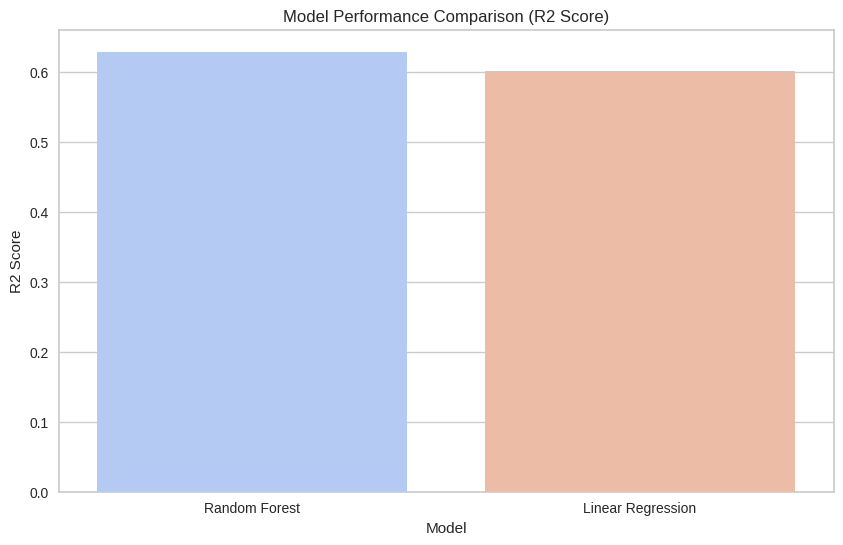

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    results[name] = {'MAE': mae, 'MSE': mse, 'R2 Score': r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# Visualize model performances
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R2 Score'], palette='coolwarm')
plt.title("Model Performance Comparison (R2 Score)")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.show()


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, scoring='r2', cv=3, verbose=2)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_sa

**Forecasting**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

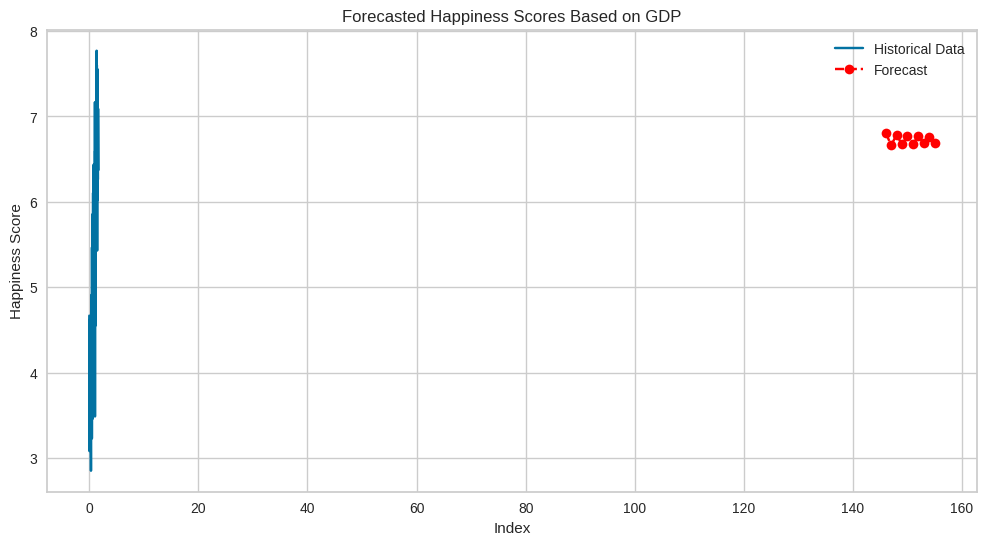

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Group by GDP and predict future happiness
gdp_happiness = happiness_data.groupby('GDP per capita')['Score'].mean()

# Fit ARIMA model
model = ARIMA(gdp_happiness, order=(2, 1, 2))
fitted_model = model.fit()

# Forecast future happiness scores
forecast = fitted_model.forecast(steps=10)
forecast_index = list(range(len(gdp_happiness), len(gdp_happiness) + len(forecast)))

# Visualize forecast
plt.figure(figsize=(12, 6))
plt.plot(gdp_happiness.index, gdp_happiness.values, label='Historical Data')
plt.plot(forecast_index, forecast, label='Forecast', linestyle="--", marker='o', color='red')
plt.title("Forecasted Happiness Scores Based on GDP")
plt.xlabel("Index")
plt.ylabel("Happiness Score")
plt.legend()
plt.grid(True)
plt.show()


Forecasting Model Evaluations

ACF and PACF for Residuals

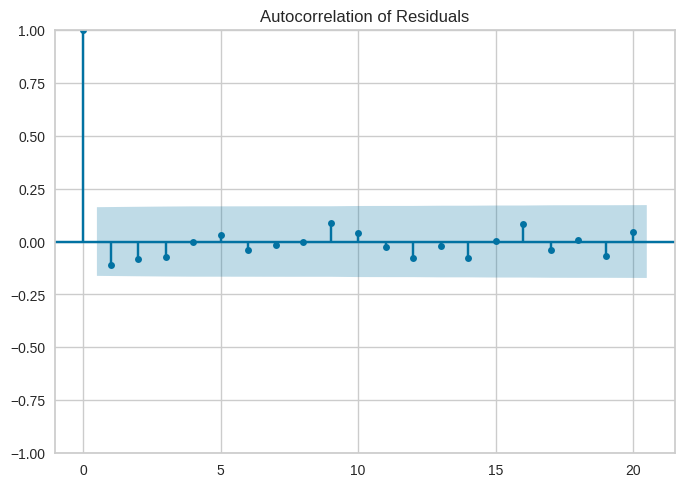

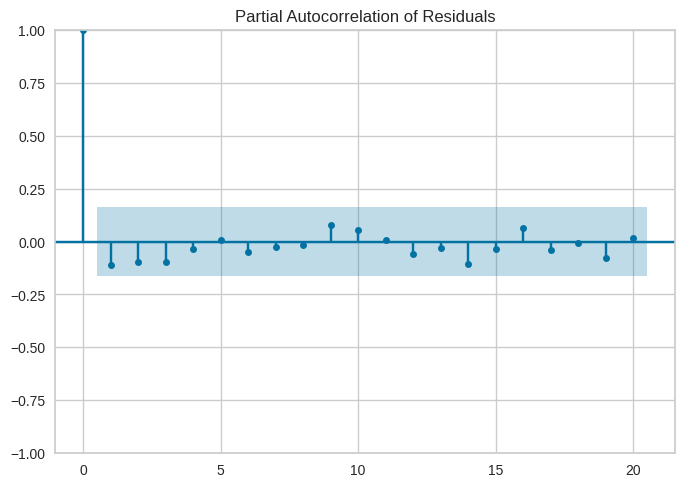

In [ ]:
# ACF and PACF for residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals, lags=20)
plt.title("Autocorrelation of Residuals")
plt.show()

plot_pacf(residuals, lags=20)
plt.title("Partial Autocorrelation of Residuals")
plt.show()

Historical Happiness Scores Based on GDP

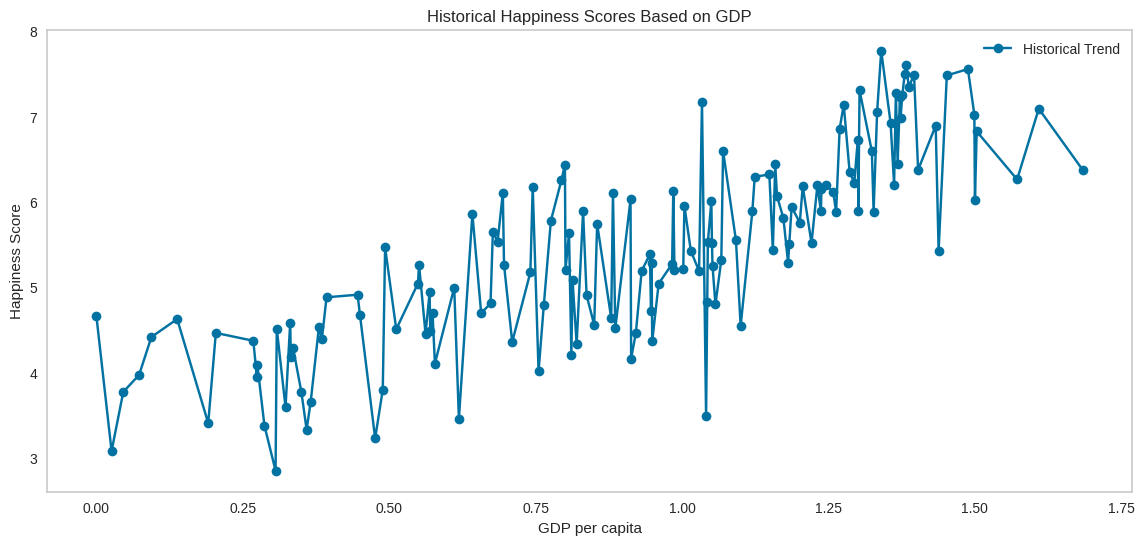

In [ ]:
# Historical trend visualization
plt.figure(figsize=(14, 6))
plt.plot(gdp_happiness.index, gdp_happiness.values, label="Historical Trend", marker="o")
plt.title("Historical Happiness Scores Based on GDP")
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.grid()
plt.show()

Residual Diagnostics of ARIMA Model

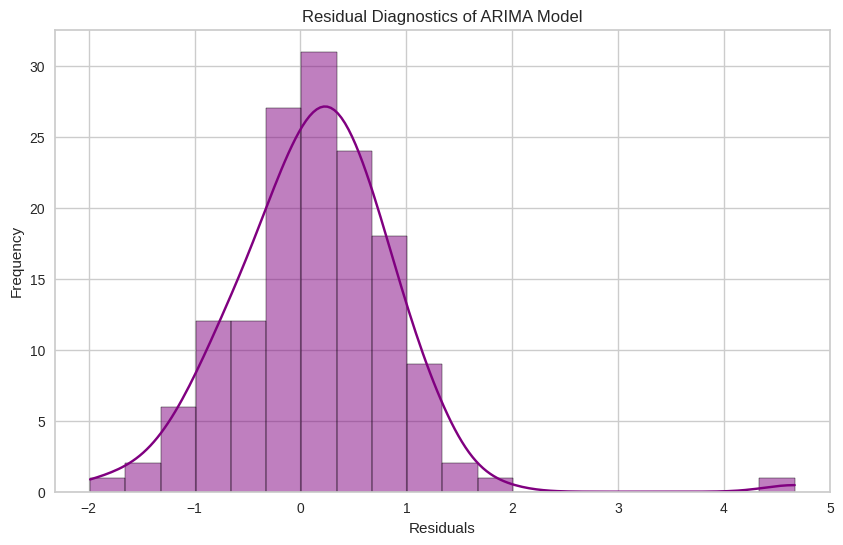

In [ ]:
# Check residual diagnostics of ARIMA model
residuals = fitted_model.resid
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Diagnostics of ARIMA Model")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Happiness Score Forecast with Confidence Interval

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


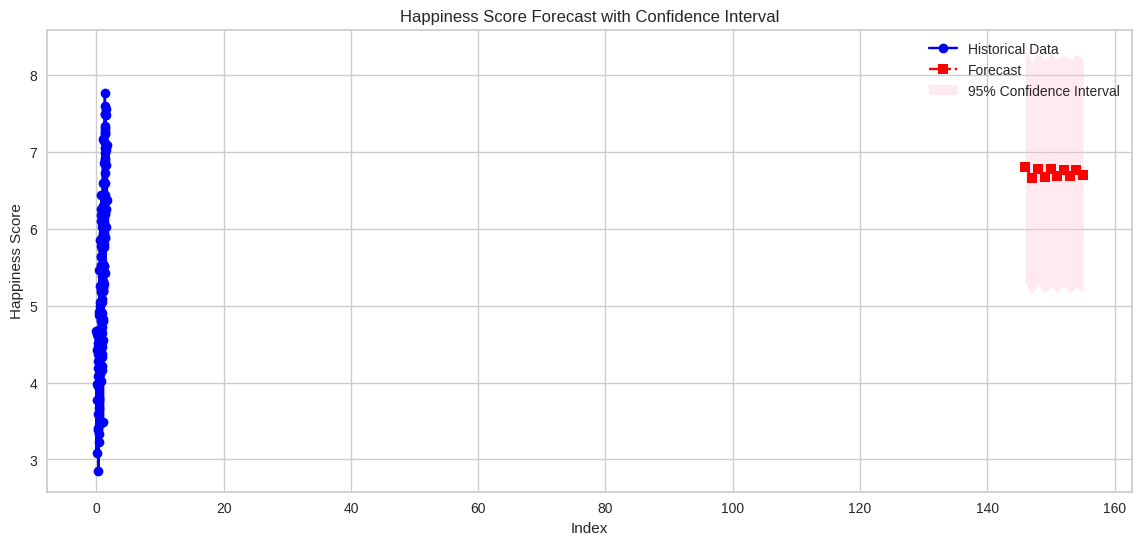

In [ ]:
forecast = fitted_model.forecast(steps=10)
forecast_index = list(range(len(gdp_happiness), len(gdp_happiness) + len(forecast)))

plt.figure(figsize=(14, 6))
plt.plot(gdp_happiness.index, gdp_happiness.values, label='Historical Data', marker="o", color="blue")
plt.plot(forecast_index, forecast, label='Forecast', linestyle="--", marker='s', color="red")
plt.fill_between(forecast_index, forecast - 1.96 * np.std(residuals), forecast + 1.96 * np.std(residuals),
                 color='pink', alpha=0.3, label="95% Confidence Interval")
plt.title("Happiness Score Forecast with Confidence Interval")
plt.xlabel("Index")
plt.ylabel("Happiness Score")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluation of forecast accuracy using Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

historical_values = gdp_happiness.values[-10:]  # Simulated last known values
forecast_values = forecast[:len(historical_values)]
mape = mean_absolute_percentage_error(historical_values, forecast_values)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 7.68%
